In [254]:
!pip install -r requirements.txt

In [163]:
import sklearn
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.express as px
import seaborn as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

In [164]:
df_scores= pd.read_csv('clean_data/scores.csv')
df_data = pd.read_csv('clean_data/clean_SSA_2016_2020_School_dbn.csv')
df_type = pd.read_csv('clean_data/more_school_dbn.csv')
cleaning = pd.read_csv('clean_data/cleaning.csv')
mental_health_df = pd.read_csv('clean_data/paulsmhdata.csv')

In [165]:
df_scores.head()

School ID                                        School Name    Borough  \
0    02M260                 Clinton School Writers and Artists  Manhattan   
1    06M211  Inwood Early College for Health and Informatio...  Manhattan   
2    01M539  New Explorations into Science, Technology and ...  Manhattan   
3    02M294                               Essex Street Academy  Manhattan   
4    02M308                       Lower Manhattan Arts Academy  Manhattan   

  Building Code        Street Address       City State  Zip Code  Latitude  \
0          M933  425 West 33rd Street  Manhattan    NY     10001  40.75321   
1          M052    650 Academy Street  Manhattan    NY     10002  40.86605   
2          M022   111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445      350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445      350 Grand Street  Manhattan    NY     10002  40.71687   

   Longitude  ... End Time Student Enrollment Percent White  Percent Black  \
0  -73.99786  ...      NaN                NaN           NaN            NaN   
1  -73.92486  ...  3:00 PM               87.0         3.40%         21.80%   
2  -73.97943  ...  4:00 PM             1735.0        28.60%         13.30%   
3  -73.98953  ...  2:45 PM              358.0        11.70%         38.50%   
4  -73.98953  ...  3:00 PM              383.0         3.10%         28.20%   

  Percent Hispanic Percent Asian Average Score (SAT Math)  \
0              NaN           NaN                      NaN   
1           67.80%         4.60%                      NaN   
2           18.00%        38.50%                    657.0   
3           41.30%         5.90%                    395.0   
4           56.90%         8.60%                    418.0   

  Average Score (SAT Reading)  Average Score (SAT Writing)  Percent Tested  
0                         NaN                          NaN             NaN  
1                         NaN                          NaN             NaN  
2                       601.0                        601.0          91.00%  
3                       411.0                        387.0          78.90%  
4                       428.0                        415.0          65.10%  

[5 rows x 22 columns]

In [166]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    435 non-null    object 
 1   School Name                  435 non-null    object 
 2   Borough                      435 non-null    object 
 3   Building Code                435 non-null    object 
 4   Street Address               435 non-null    object 
 5   City                         435 non-null    object 
 6   State                        435 non-null    object 
 7   Zip Code                     435 non-null    int64  
 8   Latitude                     435 non-null    float64
 9   Longitude                    435 non-null    float64
 10  Phone Number                 435 non-null    object 
 11  Start Time                   431 non-null    object 
 12  End Time                     431 non-null    object 
 13  Student Enrollment  

In [167]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42707 entries, 0 to 42706
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   School ID          42454 non-null  object
 1   School Campus      42707 non-null  object
 2   Intervention Type  42707 non-null  object
 3   Scanning Type      42705 non-null  object
 4   School Related     42707 non-null  object
 5   School Hours       42707 non-null  object
 6   Enforcment By      31692 non-null  object
 7   Restraints         42707 non-null  object
 8   Force              42318 non-null  object
 9   Top Charge         4565 non-null   object
 10  SummonsCharge      2895 non-null   object
 11  Classification     12283 non-null  object
 12  Incident Location  42631 non-null  object
 13  Scanning Incident  42624 non-null  object
 14  Greater Than 21    41499 non-null  object
 15  Type Of Force      41197 non-null  object
 16  Year               42707 non-null  int64

In [168]:
df_data.head()

School ID           School Campus Intervention Type Scanning Type  \
0    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   
1    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   
2    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   
3    21K410  Abraham Lincoln HS(BS)   Child in Crisis     Full-Time   
4    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   

  School Related School Hours Enforcment By Restraints Force       Top Charge  \
0              Y            Y        PATROL        Yes     N  CRIM POS WEAPON   
1              Y            Y        PATROL        Yes     N          ASSAULT   
2              N            Y        PATROL        Yes     N             CPSP   
3              Y            Y           NaN        Yes   NaN              NaN   
4              Y            Y        PATROL        Yes     N       AGG HARASS   

  SummonsCharge Classification Incident Location Scanning Incident  \
0           NaN              M           On-Site                 Y   
1           NaN              F           On-Site                 N   
2           NaN              M          Off-Site                 N   
3           NaN            NaN               NaN               NaN   
4           NaN              M           On-Site                 N   

  Greater Than 21 Type Of Force  Year  
0             NaN           NaN  2016  
1             NaN           NaN  2016  
2             NaN           NaN  2016  
3             NaN           NaN  2016  
4             NaN           NaN  2016

In [169]:
cleaning.head()

School ID           School Campus Intervention Type Scanning Type  \
0    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   
1    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   
2    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   
3    21K410  Abraham Lincoln HS(BS)   Child in Crisis     Full-Time   
4    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   

  School Related School Hours Enforcment By Restraints Force       Top Charge  \
0              Y            Y        PATROL        Yes     N  CRIM POS WEAPON   
1              Y            Y        PATROL        Yes     N          ASSAULT   
2              N            Y        PATROL        Yes     N             CPSP   
3              Y            Y           NaN        Yes   NaN              NaN   
4              Y            Y        PATROL        Yes     N       AGG HARASS   

   ... Unnamed: 28 Unnamed: 29 Unnamed: 30 Unnamed: 31 Unnamed: 32  \
0  ...         NaN         NaN         NaN         NaN         NaN   
1  ...         NaN         NaN         NaN         NaN         NaN   
2  ...         NaN         NaN         NaN         NaN         NaN   
3  ...         NaN         NaN         NaN         NaN         NaN   
4  ...         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 33  Unnamed: 34  Unnamed: 35  Unnamed: 36  Unnamed: 37  
0         NaN          NaN          NaN          NaN          NaN  
1         NaN          NaN          NaN          NaN          NaN  
2         NaN          NaN          NaN          NaN          NaN  
3         NaN          NaN          NaN          NaN          NaN  
4         NaN          NaN          NaN          NaN          NaN  

[5 rows x 38 columns]

In [170]:
del cleaning['Unnamed: 17']
del cleaning['Unnamed: 18']
del cleaning['Unnamed: 19']
del cleaning['Unnamed: 20']
del cleaning['Unnamed: 21']
del cleaning['Unnamed: 22']
del cleaning['Unnamed: 23']
del cleaning['Unnamed: 24']
del cleaning['Unnamed: 25']
del cleaning['Unnamed: 26']
del cleaning['Unnamed: 27']
del cleaning['Unnamed: 28']
del cleaning['Unnamed: 29']
del cleaning['Unnamed: 30']
del cleaning['Unnamed: 31']
del cleaning['Unnamed: 32']
del cleaning['Unnamed: 33']
del cleaning['Unnamed: 34']
del cleaning['Unnamed: 35']
del cleaning['Unnamed: 36']
del cleaning['Unnamed: 37']

In [171]:
cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42707 entries, 0 to 42706
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   School ID          42155 non-null  object
 1   School Campus      42707 non-null  object
 2   Intervention Type  42707 non-null  object
 3   Scanning Type      42705 non-null  object
 4   School Related     42707 non-null  object
 5   School Hours       42707 non-null  object
 6   Enforcment By      31692 non-null  object
 7   Restraints         42707 non-null  object
 8   Force              42318 non-null  object
 9   Top Charge         4565 non-null   object
 10  SummonsCharge      2895 non-null   object
 11  Classification     12283 non-null  object
 12  Incident Location  42631 non-null  object
 13  Scanning Incident  42624 non-null  object
 14  Greater Than 21    41499 non-null  object
 15  Type Of Force      41197 non-null  object
 16  Year               42707 non-null  int64

In [172]:
df = pd.merge(df_scores, cleaning, on=['School ID']).fillna(0)
df.head()

School ID                                        School Name    Borough  \
0    01M539  New Explorations into Science, Technology and ...  Manhattan   
1    01M539  New Explorations into Science, Technology and ...  Manhattan   
2    01M539  New Explorations into Science, Technology and ...  Manhattan   
3    01M539  New Explorations into Science, Technology and ...  Manhattan   
4    01M539  New Explorations into Science, Technology and ...  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
0          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
1          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
4          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   

   Longitude  ...     Restraints Force Top Charge  SummonsCharge  \
0  -73.97943  ...          Metal     N          0              0   
1  -73.97943  ...  No Restraints     N          0              0   
2  -73.97943  ...  No Restraints     N          0              0   
3  -73.97943  ...  No Restraints     N          0              0   
4  -73.97943  ...  No Restraints     N          0              0   

  Classification Incident Location Scanning Incident Greater Than 21  \
0              0           On-Site                 N              No   
1              0           On-Site                 N              No   
2              0           On-Site                 N              No   
3              0           On-Site                 N              No   
4              0           On-Site                 N              No   

   Type Of Force  Year  
0           None  2016  
1           None  2017  
2           None  2017  
3           None  2017  
4           None  2017  

[5 rows x 38 columns]

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15921 entries, 0 to 15920
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    15921 non-null  object 
 1   School Name                  15921 non-null  object 
 2   Borough                      15921 non-null  object 
 3   Building Code                15921 non-null  object 
 4   Street Address               15921 non-null  object 
 5   City                         15921 non-null  object 
 6   State                        15921 non-null  object 
 7   Zip Code                     15921 non-null  int64  
 8   Latitude                     15921 non-null  float64
 9   Longitude                    15921 non-null  float64
 10  Phone Number                 15921 non-null  object 
 11  Start Time                   15921 non-null  object 
 12  End Time                     15921 non-null  object 
 13  Student Enrollme

In [174]:
joined_df = cleaning.join(df_scores.set_index('School ID'), on='School ID', how='left')
joined_df.head()

School ID           School Campus Intervention Type Scanning Type  \
0    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   
1    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   
2    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   
3    21K410  Abraham Lincoln HS(BS)   Child in Crisis     Full-Time   
4    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   

  School Related School Hours Enforcment By Restraints Force       Top Charge  \
0              Y            Y        PATROL        Yes     N  CRIM POS WEAPON   
1              Y            Y        PATROL        Yes     N          ASSAULT   
2              N            Y        PATROL        Yes     N             CPSP   
3              Y            Y           NaN        Yes   NaN              NaN   
4              Y            Y        PATROL        Yes     N       AGG HARASS   

   ... End Time Student Enrollment Percent White Percent Black  \
0  ...  3:10 PM             2341.0        20.10%        39.80%   
1  ...  3:10 PM             2341.0        20.10%        39.80%   
2  ...  3:10 PM             2341.0        20.10%        39.80%   
3  ...  3:10 PM             2341.0        20.10%        39.80%   
4  ...  3:10 PM             2341.0        20.10%        39.80%   

  Percent Hispanic Percent Asian  Average Score (SAT Math)  \
0           23.70%        15.10%                     441.0   
1           23.70%        15.10%                     441.0   
2           23.70%        15.10%                     441.0   
3           23.70%        15.10%                     441.0   
4           23.70%        15.10%                     441.0   

  Average Score (SAT Reading) Average Score (SAT Writing) Percent Tested  
0                       422.0                       422.0         54.90%  
1                       422.0                       422.0         54.90%  
2                       422.0                       422.0         54.90%  
3                       422.0                       422.0         54.90%  
4                       422.0                       422.0         54.90%  

[5 rows x 38 columns]

In [175]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42707 entries, 0 to 42706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    42155 non-null  object 
 1   School Campus                42707 non-null  object 
 2   Intervention Type            42707 non-null  object 
 3   Scanning Type                42705 non-null  object 
 4   School Related               42707 non-null  object 
 5   School Hours                 42707 non-null  object 
 6   Enforcment By                31692 non-null  object 
 7   Restraints                   42707 non-null  object 
 8   Force                        42318 non-null  object 
 9   Top Charge                   4565 non-null   object 
 10  SummonsCharge                2895 non-null   object 
 11  Classification               12283 non-null  object 
 12  Incident Location            42631 non-null  object 
 13  Scanning Inciden

In [176]:
mental_health_df.head()

Geographical District Code Building Code ATS System Code  \
0                           1          M015          01M015   
1                           1          M020          01M020   
2                           1          M034          01M034   
3                           1          M063          01M063   
4                           1          M064          01M064   

                    Location Name     Primary Address       City    Zip  \
0       P.S. 015 Roberto Clemente   333 EAST 4 STREET  MANHATTAN  10009   
1            P.S. 020 Anna Silver    166 ESSEX STREET  MANHATTAN  10002   
2  P.S. 034 Franklin D. Roosevelt  730 EAST 12 STREET  MANHATTAN  10009   
3       The STAR Academy - P.S.63   121 EAST 3 STREET  MANHATTAN  10009   
4           P.S. 064 Robert Simon   600 EAST 6 STREET  MANHATTAN  10009   

                                       Service  
0                          Community School MH  
1            School-based Mental Health Clinic  
2            School-based Mental Health Clinic  
3            School-based Mental Health Clinic  
4  School-based Health Center w/ Mental Health

In [177]:
mental_health_df.rename(columns = {'ATS System Code':'School ID'}, inplace = True)

In [178]:
mental_health_df.head()

Geographical District Code Building Code School ID  \
0                           1          M015    01M015   
1                           1          M020    01M020   
2                           1          M034    01M034   
3                           1          M063    01M063   
4                           1          M064    01M064   

                    Location Name     Primary Address       City    Zip  \
0       P.S. 015 Roberto Clemente   333 EAST 4 STREET  MANHATTAN  10009   
1            P.S. 020 Anna Silver    166 ESSEX STREET  MANHATTAN  10002   
2  P.S. 034 Franklin D. Roosevelt  730 EAST 12 STREET  MANHATTAN  10009   
3       The STAR Academy - P.S.63   121 EAST 3 STREET  MANHATTAN  10009   
4           P.S. 064 Robert Simon   600 EAST 6 STREET  MANHATTAN  10009   

                                       Service  
0                          Community School MH  
1            School-based Mental Health Clinic  
2            School-based Mental Health Clinic  
3            School-based Mental Health Clinic  
4  School-based Health Center w/ Mental Health

In [179]:
mental_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Geographical District Code  1025 non-null   int64 
 1   Building Code               1025 non-null   object
 2   School ID                   1025 non-null   object
 3   Location Name               1025 non-null   object
 4   Primary Address             1025 non-null   object
 5   City                        1025 non-null   object
 6   Zip                         1025 non-null   int64 
 7   Service                     1025 non-null   object
dtypes: int64(2), object(6)
memory usage: 64.2+ KB


In [180]:
del mental_health_df['Geographical District Code']
del mental_health_df['Building Code']
del mental_health_df['Location Name']
del mental_health_df['Primary Address']
del mental_health_df['City']
del mental_health_df['Zip'] 

In [181]:
mental_health_df.head()

School ID                                      Service
0    01M015                          Community School MH
1    01M020            School-based Mental Health Clinic
2    01M034            School-based Mental Health Clinic
3    01M063            School-based Mental Health Clinic
4    01M064  School-based Health Center w/ Mental Health

In [182]:
new_data = mental_health_df.to_dict('series')

In [183]:
new_data

{'School ID': 0       01M015
 1       01M020
 2       01M034
 3       01M063
 4       01M064
          ...  
 1020    84X581
 1021    84X587
 1022    84X597
 1023    84X617
 1024    84X704
 Name: School ID, Length: 1025, dtype: object,
 'Service': 0                               Community School MH
 1                 School-based Mental Health Clinic
 2                 School-based Mental Health Clinic
 3                 School-based Mental Health Clinic
 4       School-based Health Center w/ Mental Health
                            ...                     
 1020    School-based Health Center w/ Mental Health
 1021    School-based Health Center w/ Mental Health
 1022    School-based Health Center w/ Mental Health
 1023    School-based Health Center w/ Mental Health
 1024    School-based Health Center w/ Mental Health
 Name: Service, Length: 1025, dtype: object}

In [161]:
joined = joined_df.join(df_type.set_index('School ID'), on='School ID', how='left')
joined.head()

School ID           School Campus Intervention Type Scanning Type  \
0    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   
1    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   
2    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   
3    21K410  Abraham Lincoln HS(BS)   Child in Crisis     Full-Time   
4    21K410  Abraham Lincoln HS(BS)          Arrested     Full-Time   

  School Related School Hours Enforcment By Restraints Force       Top Charge  \
0              Y            Y        PATROL        Yes     N  CRIM POS WEAPON   
1              Y            Y        PATROL        Yes     N          ASSAULT   
2              N            Y        PATROL        Yes     N             CPSP   
3              Y            Y           NaN        Yes   NaN              NaN   
4              Y            Y        PATROL        Yes     N       AGG HARASS   

   ... Percent White Percent Black Percent Hispanic Percent Asian  \
0  ...        20.10%        39.80%           23.70%        15.10%   
1  ...        20.10%        39.80%           23.70%        15.10%   
2  ...        20.10%        39.80%           23.70%        15.10%   
3  ...        20.10%        39.80%           23.70%        15.10%   
4  ...        20.10%        39.80%           23.70%        15.10%   

  Average Score (SAT Math) Average Score (SAT Reading)  \
0                    441.0                       422.0   
1                    441.0                       422.0   
2                    441.0                       422.0   
3                    441.0                       422.0   
4                    441.0                       422.0   

   Average Score (SAT Writing) Percent Tested                  school_name  \
0                        422.0         54.90%  Abraham Lincoln High School   
1                        422.0         54.90%  Abraham Lincoln High School   
2                        422.0         54.90%  Abraham Lincoln High School   
3                        422.0         54.90%  Abraham Lincoln High School   
4                        422.0         54.90%  Abraham Lincoln High School   

   school_type  
0  High school  
1  High school  
2  High school  
3  High school  
4  High school  

[5 rows x 40 columns]

In [184]:
join_mh = joined.join(mental_health_df.set_index('School ID'), on='School ID', how='left')
join_mh

School ID                        School Campus Intervention Type  \
0        21K410               Abraham Lincoln HS(BS)          Arrested   
1        21K410               Abraham Lincoln HS(BS)          Arrested   
2        21K410               Abraham Lincoln HS(BS)          Arrested   
3        21K410               Abraham Lincoln HS(BS)   Child in Crisis   
4        21K410               Abraham Lincoln HS(BS)          Arrested   
...         ...                                  ...               ...   
42702    02M620                 NORMAN THOMAS HS(MS)   Child in Crisis   
42703      3444                            PS 10(BS)         Mitigated   
42704      3445                     PS 216(Brooklyn)         Mitigated   
42705      3446                             PS 1(BS)   Child in Crisis   
42706    07X527  BRONX LEADERSHIP ACADEMY II HS(XW)    Child in Crisis   

      Scanning Type School Related School Hours Enforcment By     Restraints  \
0         Full-Time              Y            Y        PATROL            Yes   
1         Full-Time              Y            Y        PATROL            Yes   
2         Full-Time              N            Y        PATROL            Yes   
3         Full-Time              Y            Y           NaN            Yes   
4         Full-Time              Y            Y        PATROL            Yes   
...             ...            ...          ...           ...            ...   
42702     Full-Time              Y            Y           NaN  No Restraints   
42703  Non-Scanning              Y            Y           DOE  No Restraints   
42704  Non-Scanning              Y            Y           DOE  No Restraints   
42705  Non-Scanning              Y            Y           NaN  No Restraints   
42706  Non-Scanning              Y            Y           NaN  No Restraints   

      Force       Top Charge  ... Percent Black Percent Hispanic  \
0         N  CRIM POS WEAPON  ...        39.80%           23.70%   
1         N          ASSAULT  ...        39.80%           23.70%   
2         N             CPSP  ...        39.80%           23.70%   
3       NaN              NaN  ...        39.80%           23.70%   
4         N       AGG HARASS  ...        39.80%           23.70%   
...     ...              ...  ...           ...              ...   
42702     N              NaN  ...           NaN              NaN   
42703     N              NaN  ...           NaN              NaN   
42704     N              NaN  ...           NaN              NaN   
42705     N              NaN  ...           NaN              NaN   
42706     N              NaN  ...        32.30%           63.40%   

      Percent Asian Average Score (SAT Math) Average Score (SAT Reading)  \
0            15.10%                    441.0                       422.0   
1            15.10%                    441.0                       422.0   
2            15.10%                    441.0                       422.0   
3            15.10%                    441.0                       422.0   
4            15.10%                    441.0                       422.0   
...             ...                      ...                         ...   
42702           NaN                      NaN                         NaN   
42703           NaN                      NaN                         NaN   
42704           NaN                      NaN                         NaN   
42705           NaN                      NaN                         NaN   
42706         2.20%                    384.0                       355.0   

      Average Score (SAT Writing)  Percent Tested  \
0                           422.0          54.90%   
1                           422.0          54.90%   
2                           422.0          54.90%   
3                           422.0          54.90%   
4                           422.0          54.90%   
...                           ...             ...   
42702                         NaN             NaN   
42

In [185]:
join_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42707 entries, 0 to 42706
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    42155 non-null  object 
 1   School Campus                42707 non-null  object 
 2   Intervention Type            42707 non-null  object 
 3   Scanning Type                42705 non-null  object 
 4   School Related               42707 non-null  object 
 5   School Hours                 42707 non-null  object 
 6   Enforcment By                31692 non-null  object 
 7   Restraints                   42707 non-null  object 
 8   Force                        42318 non-null  object 
 9   Top Charge                   4565 non-null   object 
 10  SummonsCharge                2895 non-null   object 
 11  Classification               12283 non-null  object 
 12  Incident Location            42631 non-null  object 
 13  Scanning Inciden

In [188]:
join_mh.nunique()

School ID                      9080
School Campus                  1874
Intervention Type                 8
Scanning Type                     5
School Related                    2
School Hours                      2
Enforcment By                     9
Restraints                        4
Force                             3
Top Charge                      118
SummonsCharge                    32
Classification                    5
Incident Location                 2
Scanning Incident                 2
Greater Than 21                   2
Type Of Force                     3
Year                              5
School Name                     359
Borough                           5
Building Code                   231
Street Address                  231
City                             25
State                             1
Zip Code                        114
Latitude                        233
Longitude                       232
Phone Number                    354
Start Time                  

In [223]:
join_mh['Force'] = join_mh['Force'].str.upper()

In [17]:
joined.nunique()

School ID                      9080
School Campus                  1874
Intervention Type                 8
Scanning Type                     5
School Related                    2
School Hours                      2
Enforcment By                     9
Restraints                        4
Force                             2
Top Charge                      118
SummonsCharge                    32
Classification                    5
Incident Location                 2
Scanning Incident                 2
Greater Than 21                   2
Type Of Force                     3
Year                              5
School Name                     359
Borough                           5
Building Code                   231
Street Address                  231
City                             25
State                             1
Zip Code                        114
Latitude                        233
Longitude                       232
Phone Number                    354
Start Time                  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Brooklyn'),
  Text(1, 0, 'Bronx'),
  Text(2, 0, 'Manhattan'),
  Text(3, 0, 'Staten Island'),
  Text(4, 0, 'Jamaica'),
  Text(5, 0, 'Flushing'),
  Text(6, 0, 'Astoria'),
  Text(7, 0, 'Ozone Park'),
  Text(8, 0, 'Forest Hills'),
  Text(9, 0, 'Cambria Heights'),
  Text(10, 0, 'Springfield Gardens'),
  Text(11, 0, 'Long Island City'),
  Text(12, 0, 'Oakland Gardens'),
  Text(13, 0, 'Fresh Meadows'),
  Text(14, 0, 'Ridgewood'),
  Text(15, 0, 'Richmond Hill'),
  Text(16, 0, 'Rockaway Park'),
  Text(17, 0, 'Bellerose'),
  Text(18, 0, 'Elmhurst'),
  Text(19, 0, 'Queens Village'),
  Text(20, 0, 'Bayside'),
  Text(21, 0, 'Saint Albans'),
  Text(22, 0, 'Corona'),
  Text(23, 0, 'Hollis'),
  Text(24, 0, 'Far Rockaway')])

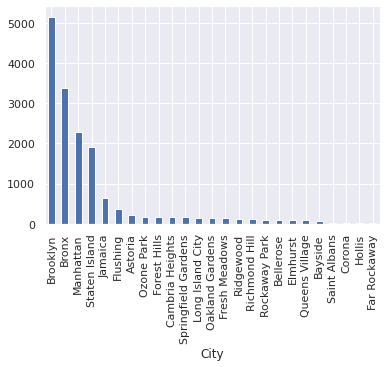

In [201]:
joined.groupby(['City'])['Force'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation ='vertical')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Community School MH'),
  Text(1, 0, 'School-based Health Center w/ Mental Health'),
  Text(2, 0, 'School Mental Health Specialist Program'),
  Text(3, 0, 'Prevention Intervention Program MH'),
  Text(4, 0, 'School-based Mental Health Clinic'),
  Text(5, 0, 'School Response Team'),
  Text(6, 0, 'H+H School')])

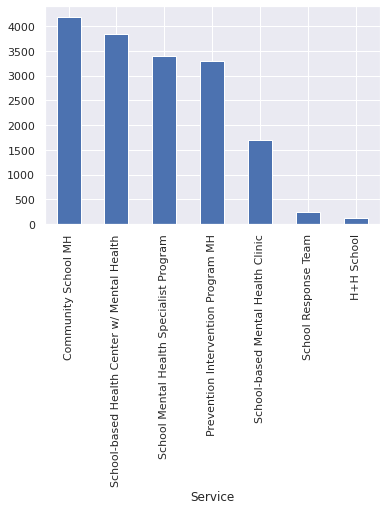

In [200]:
join_mh.groupby(['Service'])['Force'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation ='vertical')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'High school'),
  Text(1, 0, 'Junior High-Intermediate-Middle'),
  Text(2, 0, 'Secondary School'),
  Text(3, 0, 'K-8'),
  Text(4, 0, 'Elementary'),
  Text(5, 0, 'K-12 all grades'),
  Text(6, 0, 'Ungraded')])

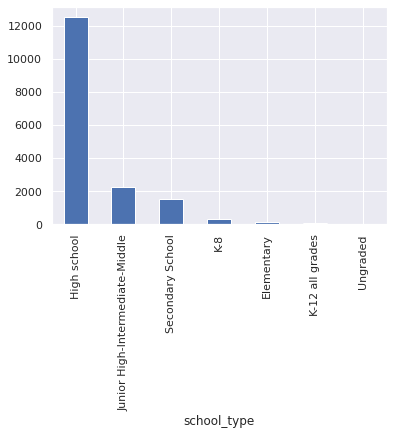

In [205]:
join_mh.groupby(['school_type'])['Service'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation ='vertical')

Text(0.5, 1.0, 'Service')

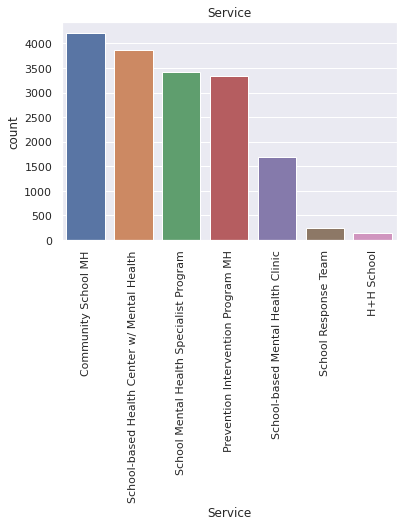

In [211]:
sns.countplot(x='Service', data = join_mh, order=join_mh['Service'].value_counts().index)
plt.xticks(rotation ='vertical')
plt.title("Service")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Brooklyn'),
  Text(1, 0, 'Bronx'),
  Text(2, 0, 'Queens'),
  Text(3, 0, 'Manhattan'),
  Text(4, 0, 'Staten Island')])

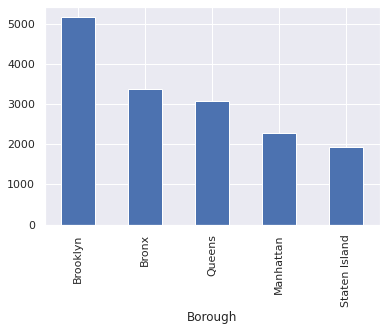

In [202]:
joined.groupby(['Borough'])['Force'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation ='vertical')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'High school'),
  Text(1, 0, 'Junior High-Intermediate-Middle'),
  Text(2, 0, 'Secondary School'),
  Text(3, 0, 'Elementary'),
  Text(4, 0, 'K-8'),
  Text(5, 0, 'K-12 all grades'),
  Text(6, 0, 'Ungraded')])

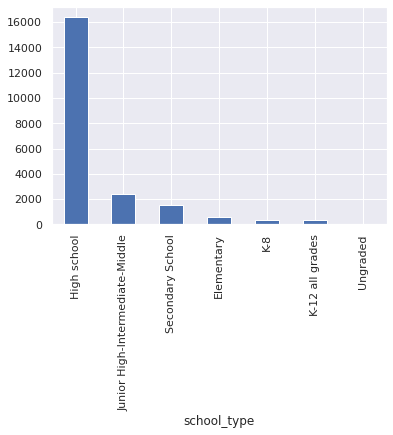

In [203]:
joined.groupby(['school_type'])['Force'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation ='vertical')

In [21]:
force_city_cross = pd.crosstab(df['Intervention Type'], df['City'])
force_city_cross

City               Astoria  Bayside  Bellerose  Bronx  Brooklyn  \
Intervention Type                                                 
Arrested                43       21          4    440       545   
Child in Crisis         99        4          1    670       663   
Juvenile Report         27       18          3    550       440   
Mitigated               40       21         89   1208      2926   
PINS / Warrant           0        1          0     13        19   
PINS Warrant             0        0          0      4         1   
Summons                 12        7          4    437       430   
mitigated                4        3          0     58       179   

City               Cambria Heights  Corona  Elmhurst  Far Rockaway  Flushing  \
Intervention Type                                                              
Arrested                        26       1        22             4        78   
Child in Crisis                 47       8        36             2        57   
Juvenile Report                  8       1         7             2        63   
Mitigated                       71       6        21             2       108   
PINS / Warrant                   2       0         0             0         5   
PINS Warrant                     1       0         0             0         1   
Summons                         12       1         6             3        53   
mitigated                        1       2         3             0        10   

City               ...  Manhattan  Oakland Gardens  Ozone Park  \
Intervention Type  ...                                           
Arrested           ...        363               42          34   
Child in Crisis    ...        579               29          50   
Juvenile Report    ...        398               29          12   
Mitigated          ...        603               22          51   
PINS / Warrant     ...          7                0           1   
PINS Warrant       ...          1                0           0   
Summons            ...        310               21          18   
mitigated          ...         23                0           1   

City               Queens Village  Richmond Hill  Ridgewood  Rockaway Park  \
Intervention Type                                                            
Arrested                       17             23         18             10   
Child in Crisis                 7             15         48             17   
Juvenile Report                14              9         12             17   
Mitigated                      27             47         28             37   
PINS / Warrant                  0              3          0              0   
PINS Warrant                    0              0          0              0   
Summons                        20             21         21             17   
mitigated                       1              0          1              5   

City               Saint Albans  Springfield Gardens  Staten Island  
Intervention Type                                                    
Arrested                      5                   10            182  
Child in Crisis               7                   28            202  
Juvenile Report               0                    7            210  
Mitigated                    11                   94           1111  
PINS / Warrant                0                    0             21  
PINS Warrant                  0                    0              1  
Summons                       1                   16            126  
mitigated                     0                    4             95  

[8 rows x 25 columns]

Text(0.5, 1.0, 'Intervention vs. City')

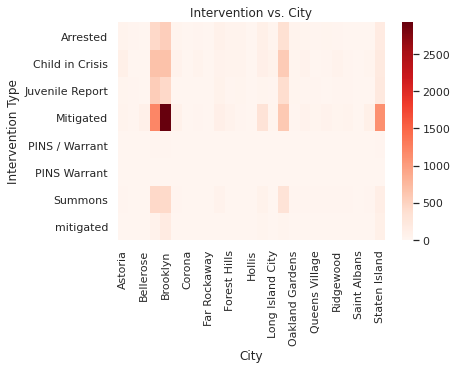

In [22]:
ax = sns.heatmap(force_city_cross, cmap="Reds")
ax.set_title("Intervention vs. City")

In [224]:
join_mh['Force'].unique()

array(['N', nan, 'Y'], dtype=object)

In [24]:
joined['Force'].unique()

array(['N', nan, 'Y'], dtype=object)

In [25]:
used_force = joined['Force'].value_counts()['Y']

In [26]:
force_city_cross = pd.crosstab(used_force, joined['City'])
force_city_cross

City   Astoria  Bayside  Bellerose  Bronx  Brooklyn  Cambria Heights  Corona  \
row_0                                                                          
538        225       75        101   3380      5203              168      19   

City   Elmhurst  Far Rockaway  Flushing  ...  Manhattan  Oakland Gardens  \
row_0                                    ...                               
538          95            13       375  ...       2284              143   

City   Ozone Park  Queens Village  Richmond Hill  Ridgewood  Rockaway Park  \
row_0                                                                        
538           167              86            118        128            103   

City   Saint Albans  Springfield Gardens  Staten Island  
row_0                                                    
538              24                  159           1948  

[1 rows x 25 columns]

In [27]:
joined['City'].value_counts()

Brooklyn               5203
Bronx                  3380
Manhattan              2284
Staten Island          1948
Jamaica                 641
Flushing                375
Astoria                 225
Cambria Heights         168
Ozone Park              167
Forest Hills            166
Springfield Gardens     159
Long Island City        149
Oakland Gardens         143
Fresh Meadows           135
Ridgewood               128
Richmond Hill           118
Rockaway Park           103
Bellerose               101
Elmhurst                 95
Queens Village           86
Bayside                  75
Saint Albans             24
Corona                   19
Hollis                   16
Far Rockaway             13
Name: City, dtype: int64

Text(0.5, 1.0, 'City')

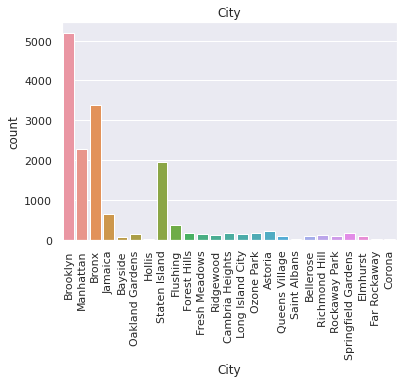

In [37]:
sns.countplot(x='City', data = joined)
plt.xticks(rotation ='vertical')
plt.title("City")

<ipython-input-214-deaabcbc1221>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_correlations, dtype=np.bool)


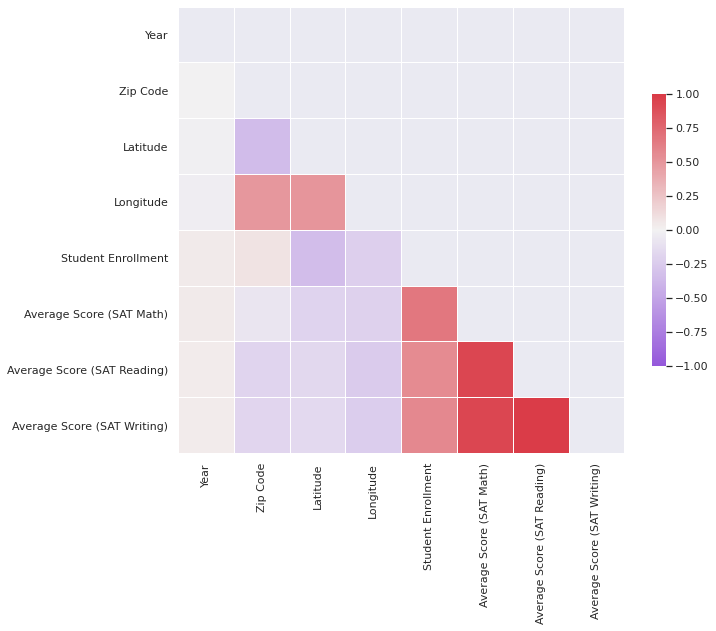

In [214]:
#compute correlation matrix
df_correlations = join_mh.corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))

cmap = sns.diverging_palette(280, 10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap, 
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [225]:
df_corr = pd.crosstab(join_mh['Force'], join_mh['Service'], normalize='index')
df_corr

Service  Community School MH  H+H School  Prevention Intervention Program MH  \
Force                                                                          
N                   0.250498    0.007670                            0.194939   
Y                   0.207373    0.009217                            0.290323   

Service  School Mental Health Specialist Program  School Response Team  \
Force                                                                    
N                                       0.202669              0.014192   
Y                                       0.156682              0.009217   

Service  School-based Health Center w/ Mental Health  \
Force                                                  
N                                           0.228939   
Y                                           0.253456   

Service  School-based Mental Health Clinic  
Force                                       
N                                 0.101093  
Y                                 0.073733

In [218]:
def plot_heatmap(cross_table, fmt='g'):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.heatmap(cross_table,
                annot=True,
                fmt=fmt,
                cmap='rocket_r',
                linewidths=.5,
                ax=ax)
    plt.show();

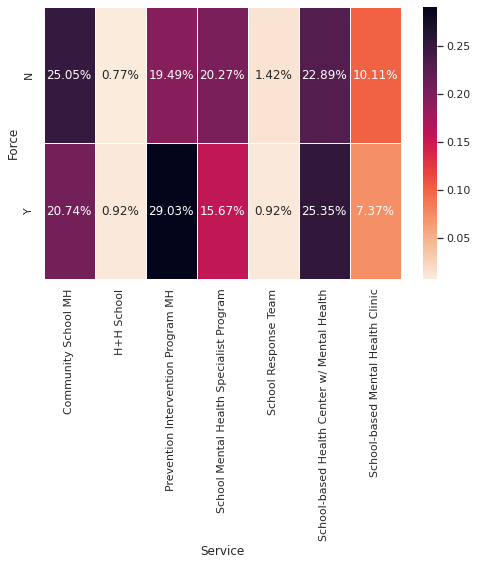

In [227]:
plot_heatmap(df_corr, fmt='.2%')

In [228]:
# Create correlation matrix
corr_matrix = joined.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
top = [column for column in upper.columns if any(upper[column] > 0.95)]
print(upper)

                             Year  Zip Code  Latitude  Longitude  \
Year                          NaN  0.005374  0.021133   0.025093   
Zip Code                      NaN       NaN  0.345325   0.496767   
Latitude                      NaN       NaN       NaN   0.504322   
Longitude                     NaN       NaN       NaN        NaN   
Student Enrollment            NaN       NaN       NaN        NaN   
Average Score (SAT Math)      NaN       NaN       NaN        NaN   
Average Score (SAT Reading)   NaN       NaN       NaN        NaN   
Average Score (SAT Writing)   NaN       NaN       NaN        NaN   

                             Student Enrollment  Average Score (SAT Math)  \
Year                                   0.045586                  0.041721   
Zip Code                               0.082895                  0.080947   
Latitude                               0.341642                  0.201257   
Longitude                              0.222039                  0.216957   
St

<ipython-input-228-20efed432833>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [229]:
folium_map = folium.Map()
folium_map

In [230]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords)
folium_map

In [231]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=13)
folium_map

In [232]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=13, tiles="OpenStreetMap")
folium_map

In [233]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=13, tiles="Stamen Terrain")
folium_map

In [234]:
folium_hmap = folium.Map(location=ny_coords, zoom_start=10, tiles="OpenStreetMap")

In [235]:
my_zip = zip(joined['Latitude'].dropna(), joined['Longitude'].dropna())
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(40.58231, -73.96747),
 (40.58231, -73.96747),
 (40.58231, -73.96747),
 (40.58231, -73.96747),
 (40.58231, -73.96747),
 (40.58231, -73.96747),
 (40.63263, -73.9178),
 (40.69696, -73.91082),
 (40.69696, -73.91082),
 (40.73552, -73.9876),
 (40.73552, -73.9876),
 (40.69696, -73.91082),
 (40.67851, -73.96207),
 (40.68893, -73.92108),
 (40.81825, -73.91974)]

In [236]:
hm_layer = HeatMap(list_of_my_zip,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=8,
                   blur=6, 
                 )

In [237]:
folium_hmap.add_child(hm_layer)
folium_hmap

In [238]:

lat_log_force_yes = joined.loc[ joined['Force']=='Y', ["Latitude","Longitude" ] ].dropna()
lat_log_force_no = joined.loc[ joined['Force']=='N', ["Latitude","Longitude" ] ].dropna()
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")
for i in range(215):
    marker = folium.CircleMarker(location=[lat_log_force_yes["Latitude"].iloc[i],lat_log_force_yes["Longitude"].iloc[i]],radius=5,color="red",fill=True)
    marker.add_to(folium_map)

for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_force_no["Latitude"].iloc[i],lat_log_force_no["Longitude"].iloc[i]],radius=5,color="blue",fill=True)
    marker.add_to(folium_map)    
    
folium_map

In [263]:
join_mh['Service'].unique()

array(['Prevention Intervention Program MH',
       'School-based Health Center w/ Mental Health',
       'Community School MH', nan,
       'School Mental Health Specialist Program',
       'School-based Mental Health Clinic', 'H+H School',
       'School Response Team'], dtype=object)

In [285]:
lat_log_service_csmh = join_mh.loc[ join_mh['Service']=='Community School MH', ["Latitude","Longitude" ] ].dropna()
lat_log_service_pipmh = join_mh.loc[ join_mh['Service']=='Prevention Intervention Program MH', ["Latitude","Longitude" ] ].dropna()
lat_log_service_sbhcwmh = join_mh.loc[ join_mh['Service']=='School-based Health Center w/ Mental Health', ["Latitude","Longitude" ] ].dropna()
lat_log_service_smhsp = join_mh.loc[ join_mh['Service']=='School Mental Health Specialist Program', ["Latitude","Longitude" ] ].dropna()
lat_log_service_sbmhc = join_mh.loc[ join_mh['Service']=='School-based Mental Health Clinic', ["Latitude","Longitude" ] ].dropna()
lat_log_service_hhs = join_mh.loc[ join_mh['Service']=='H+H School', ["Latitude","Longitude" ] ].dropna()
lat_log_service_srt = join_mh.loc[ join_mh['Service']=='School Response Team', ["Latitude","Longitude" ] ].dropna()

folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")
for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_service_csmh["Latitude"].iloc[i],lat_log_service_csmh["Longitude"].iloc[i]],radius=5,color="blue",fill=True)
    marker.add_to(folium_map)  
     
for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_service_pipmh["Latitude"].iloc[i],lat_log_service_pipmh["Longitude"].iloc[i]],radius=5,color="red",fill=True)
    marker.add_to(folium_map)    
    
for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_service_sbhcwmh["Latitude"].iloc[i],lat_log_service_sbhcwmh["Longitude"].iloc[i]],radius=5,color="purple",fill=True)
    marker.add_to(folium_map)    

for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_service_smhsp["Latitude"].iloc[i],lat_log_service_smhsp["Longitude"].iloc[i]],radius=5,color="green",fill=True)
    marker.add_to(folium_map)    
    
for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_service_sbmhc["Latitude"].iloc[i],lat_log_service_sbmhc["Longitude"].iloc[i]],radius=5,color="orange",fill=True)
    marker.add_to(folium_map)    
    
for i in range(40):
    marker = folium.CircleMarker(location=[lat_log_service_hhs["Latitude"].iloc[i],lat_log_service_hhs["Longitude"].iloc[i]],radius=5,color="yellow",fill=True)
    marker.add_to(folium_map)    

for i in range(3):
    marker = folium.CircleMarker(location=[lat_log_service_srt["Latitude"].iloc[i],lat_log_service_srt["Longitude"].iloc[i]],radius=5,color="pink",fill=True)
    marker.add_to(folium_map) 
    
folium_map

In [239]:
nypd_data = pd.read_csv('clean_data/NYPD_Complaint_Data_Historic.csv')
nypd_data.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0   932184137   01/01/2016     00:00:00   11/30/2019     22:00:00   
1   524734897   01/01/2016     00:20:00   05/16/2017     16:00:00   
2   425311840   01/01/2016     00:00:00   11/13/2019     06:00:00   
3   211927249   01/01/2016     19:00:00   12/31/2016     19:00:00   
4   934187944   01/01/2016     12:00:00   11/01/2018     12:00:00   

   ADDR_PCT_CD      RPT_DT  KY_CD                OFNS_DESC  PD_CD  ...  \
0           34  12/14/2019    116               SEX CRIMES  177.0  ...   
1           67  11/18/2019    112              THEFT-FRAUD  739.0  ...   
2          120  11/13/2019    126  MISCELLANEOUS PENAL LAW  697.0  ...   
3           46  11/18/2019    233               SEX CRIMES  175.0  ...   
4          112  10/30/2019    233               SEX CRIMES  175.0  ...   

  SUSP_SEX TRANSIT_DISTRICT   Latitude  Longitude  \
0        M              NaN  40.851488 -73.935458   
1      NaN              NaN  40.645922 -73.950965   
2        M              NaN  40.644726 -74.077483   
3      NaN              NaN  40.853960 -73.900121   
4        U              NaN  40.722364 -73.851474   

                                   Lat_Lon                PATROL_BORO  \
0  (40.85148777400008, -73.93545796699993)      PATROL BORO MAN NORTH   
1  (40.64592203900003, -73.95096460799994)    PATROL BORO BKLYN SOUTH   
2  (40.64472613100002, -74.07748315899995)  PATROL BORO STATEN ISLAND   
3  (40.85396027400003, -73.90012087499997)          PATROL BORO BRONX   
4  (40.72236368700004, -73.85147389399998)   PATROL BORO QUEENS NORTH   

  STATION_NAME  VIC_AGE_GROUP        VIC_RACE VIC_SEX  
0          NaN            <18  BLACK HISPANIC       F  
1          NaN          25-44           BLACK       F  
2          NaN        UNKNOWN         UNKNOWN       E  
3          NaN            <18  BLACK HISPANIC       F  
4          NaN            <18  WHITE HISPANIC       F  

[5 rows x 35 columns]

In [240]:
nypd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CMPLNT_NUM         2345 non-null   int64  
 1   CMPLNT_FR_DT       2345 non-null   object 
 2   CMPLNT_FR_TM       2345 non-null   object 
 3   CMPLNT_TO_DT       1957 non-null   object 
 4   CMPLNT_TO_TM       1956 non-null   object 
 5   ADDR_PCT_CD        2345 non-null   int64  
 6   RPT_DT             2345 non-null   object 
 7   KY_CD              2345 non-null   int64  
 8   OFNS_DESC          2345 non-null   object 
 9   PD_CD              2344 non-null   float64
 10  PD_DESC            2344 non-null   object 
 11  CRM_ATPT_CPTD_CD   2345 non-null   object 
 12  LAW_CAT_CD         2345 non-null   object 
 13  BORO_NM            2344 non-null   object 
 14  LOC_OF_OCCUR_DESC  1866 non-null   object 
 15  PREM_TYP_DESC      2342 non-null   object 
 16  JURIS_DESC         2345 

In [241]:
my_zip2 = zip(nypd_data['Latitude'].dropna(), nypd_data['Longitude'].dropna())
list_of_my_zip2 = list(my_zip2)
list_of_my_zip2[0:15]

[(40.85148777400008, -73.93545796699993),
 (40.64592203900003, -73.95096460799994),
 (40.64472613100002, -74.07748315899995),
 (40.85396027400003, -73.90012087499997),
 (40.72236368700004, -73.85147389399998),
 (40.816391847000034, -73.89529641399997),
 (40.72655401900005, -73.98782842699995),
 (40.83732351100008, -73.91983075699994),
 (40.688872153000034, -73.94452903199993),
 (40.83732351100008, -73.91983075699994),
 (40.75119227300007, -73.97835693099995),
 (40.81662432900004, -73.88856544799995),
 (40.85396027400003, -73.90012087499997),
 (40.576157300000034, -73.97598379999994),
 (40.67458330800008, -73.93022154099998)]

In [242]:
hm_layer2 = HeatMap(list_of_my_zip2,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=8,
                   blur=6, 
                 )

In [243]:
folium_hmap.add_child(hm_layer2)
folium_hmap

In [244]:
join_mh.to_csv('data/map_data.csv', encoding='utf-8')